###**TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.**
---
###**Dataset Information**
* Number of instances: 4,005
* Number of attributes: 19
---
###**Features information:**
###The dataset contains features like:

* **talk_id**: Talk identification number provided by TED
* **title**: Title of the talk
* **speaker_1**: First speaker in TED's speaker list
* **all_speakers**: Speakers in the talk
* **occupations**: Occupations of the speakers
* **about_speakers**: Blurb about each speaker
* **recorded_date**: Date the talk was recorded
* **published_date**: Date the talk was published to TED.com
* **event**: Event or medium in which the talk was given
* **native_lang**: Language the talk was given in
* **available_lang**: All available languages (lang_code) for a talk
* **comments**: Count of comments
* **duration**: Duration in seconds
* **topics**: Related tags or topics for the talk
* **related_talks**: Related talks (key='talk_id',value='title')
* **url**: URL of the talk
* **description**: Description of the talk
* **transcript**: Full transcript of the talk
---
###**Target Variable :**
* **'views'**: Count of views
---
###**Goal: The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.**

#**Project Work flow**
---

1. Importing Libraries

2. Loading the Dataset

3. EDA on features 

4. Feature Engineering

5. Data Cleaning

6. Feature selection

7. Regression models and HyperParameter Tuning

8. Comparison of Models

9. Final selection of the model

10. Conclusion
--- 





#**1. Importing Libraries**

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import time
import datetime
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble
from wordcloud import WordCloud,ImageColorGenerator
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# To not get tensed with warnings, let's ignore them.
import warnings
warnings.filterwarnings('ignore')

##**After importing all necessary libraries next part is loading the dataset.**

#**2. Loading the dataset**

In [ ]:
# Loading dataset and creating dataframe

df=pd.read_csv('/content/drive/MyDrive/Copy of data_ted_talks.csv')

##**We have loaded our dataset and also created dataframe. Now, let's start EDA on features.**

#**3. EDA on features**

In [ ]:
# Printing first 5 rows of dataset.

df.head(5)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [ ]:
# Printing shape of our dataset

df.shape

(4005, 19)

* **No of instances: 4005**
* **No of variables: 19**
* **Target Variable: 'views'**

In [ ]:
# Printing statistical discription of dataset.

df.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


In [ ]:
# Printing basic info of dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

* **From above information, it is clear that we have only 4 numerical columns in our dataset out of which 1 is our target variable.**
* **Rest all columns are either categorical or they contains textual data.**
* **So, we will try to generate some numerical columns from these columns.**

##**3.1 Check for duplicated rows.**

In [ ]:
# Checking for duplicacy in the dataset

df.duplicated().sum()

0

**Great! There are zero duplicate rows in dataset.**

##**3.2 Check for null values**

In [ ]:
# checking for NaN values

df.isna().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

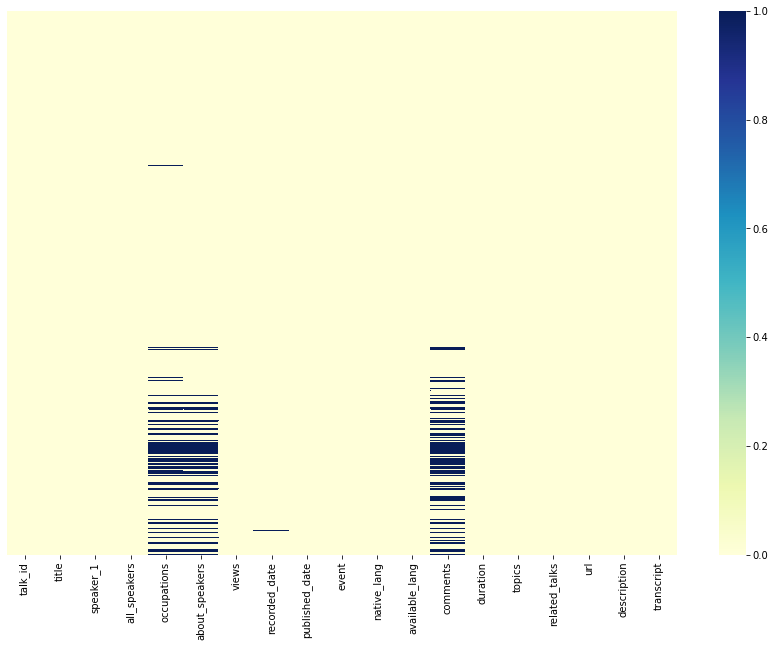

In [ ]:
# Heatmap to check missing data in dataset

plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='YlGnBu')

**The dataset contains NaN values in few columns like:**
* **all_speakers**
* **occupations**
* **about_speakers**
* **recorded_date**
* **comments**

**We will treat them later.**

##**3.3 Let's explore some column**

* ## **Speaker_1 column**

In [ ]:
# Speaker of top 10 most watched video

pop_df=df.nlargest(10, ['views'])
pop_df[['speaker_1','views','title']]

,speaker_1,views,title
4,Sir Ken Robinson,65051954,Do schools kill creativity?
1296,Amy Cuddy,57074270,Your body language may shape who you are
2062,James Veitch,56932551,This is what happens when you reply to spam email
646,Simon Sinek,49730580,How great leaders inspire action
796,Brené Brown,47544833,The power of vulnerability
1724,Julian Treasure,41504331,How to speak so that people want to listen
2108,Tim Urban,37976820,Inside the mind of a master procrastinator
1366,Cameron Russell,33874546,"Looks aren't everything. Believe me, I'm a model."
2724,Sam Berns,33691484,My philosophy for a happy life
1898,Bill Gates,33521780,The next outbreak? We're not ready


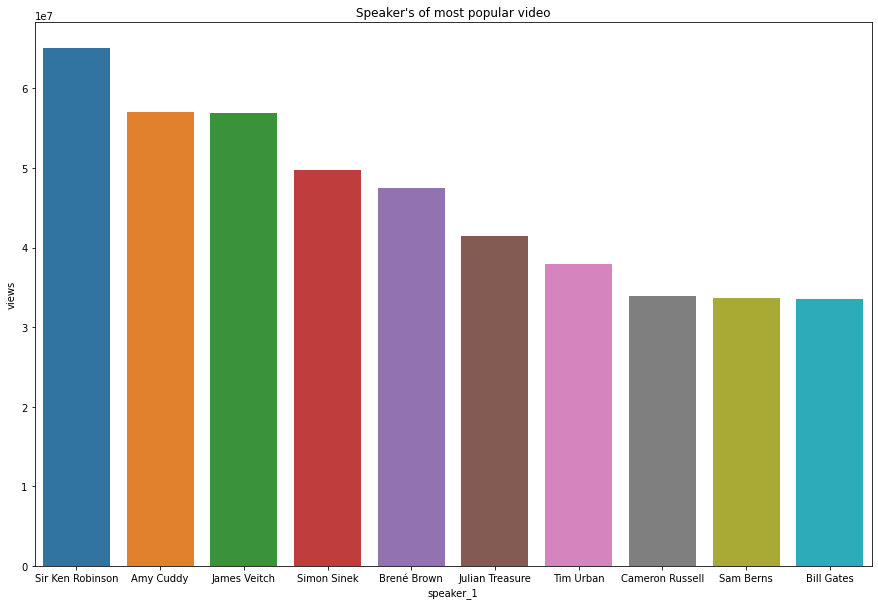

In [ ]:
# Bar plot to show speaker of top 10 popular videos.

plt.figure(figsize=(15,10))
plt.title("Speaker's of most popular video")
sns.barplot(x='speaker_1',y='views',data=pop_df)

* **Sir Ken Robinson's talk on "Do Schools Kill Creativity?" is the most popular TED Talk of all time with more than 65 million views.**
* **There is only one talk that has crossed 60 million mark while 3 talks have crossed 50 million mark.**

##**Let's find most popular speaker**

In [ ]:
# Extracting top 5 popular speaker from the dataset

pop_speaker_df=df.groupby('speaker_1').agg({'views' : 'sum'}).nlargest(5,['views'])
pop_speaker_df.reset_index(inplace=True)
pop_speaker_df

,speaker_1,views
0,Alex Gendler,117619583
1,Sir Ken Robinson,84380518
2,James Veitch,78843641
3,Simon Sinek,62661183
4,Brené Brown,61285977


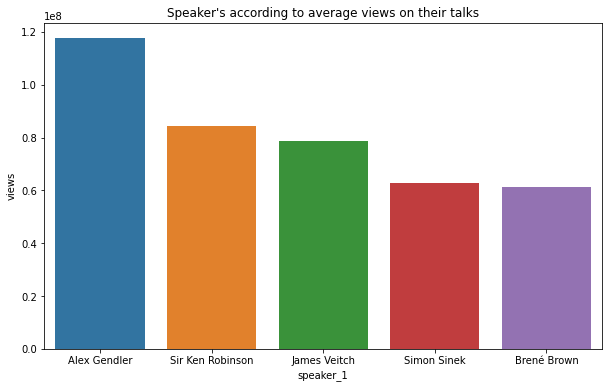

In [ ]:
# Barplot to show top 5 popular speaker.

plt.figure(figsize=(10,6))
plt.title("Speaker's according to average views on their talks")
sns.barplot(x='speaker_1',y='views',data=pop_speaker_df)

* **Alex Gendler is the most popular speaker.**

* ## **Event column**

**Most frequent event category**

In [ ]:
# Let's find the most frequent event categories

freq_event_df=df[['event','views']].groupby('event').agg({'views' : 'count'}).nlargest(5,['views'])
freq_event_df.reset_index(inplace=True)
freq_event_df

,event,views
0,TED-Ed,556
1,TED2017,96
2,TED2018,96
3,TED2019,91
4,TED2014,84


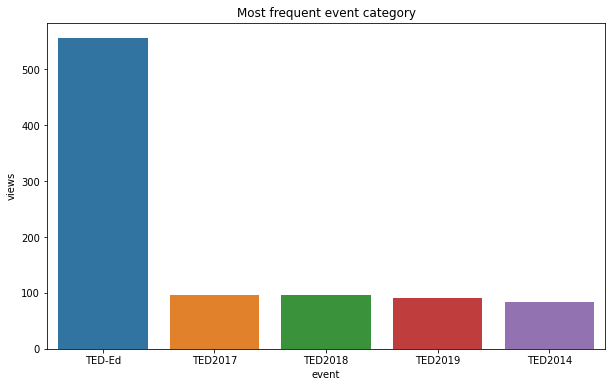

In [ ]:
# Barplot to show the most frequent event category

plt.figure(figsize=(10,6))
plt.title('Most frequent event category')
sns.barplot(x='event',y='views',data=freq_event_df)

* **TED-Ed is the most frequent event category.**

**Most popular event category**

In [ ]:
# Top 5 popular event categories

pop_event_df=df[['event','views']].groupby('event').agg({'views' : 'sum'}).nlargest(5,['views'])
pop_event_df.reset_index(inplace=True)

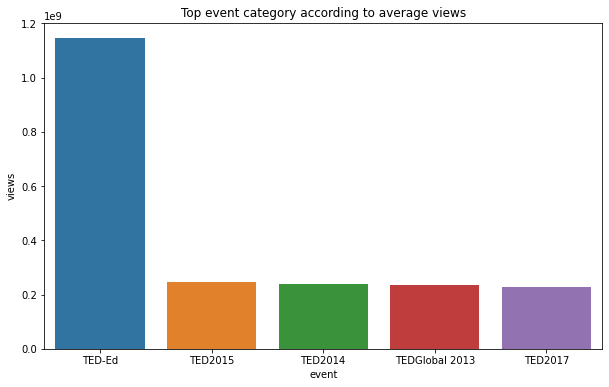

In [ ]:
# Barplot to show top event category according to average views

plt.figure(figsize=(10,6))
plt.title('Top event category according to average views')
sns.barplot(x='event',y='views',data=pop_event_df)

* **The most popular event category is TED-Ed having maximum number of total views.**

* ## **Title column**

There are 157160 words in the combination of all titles.


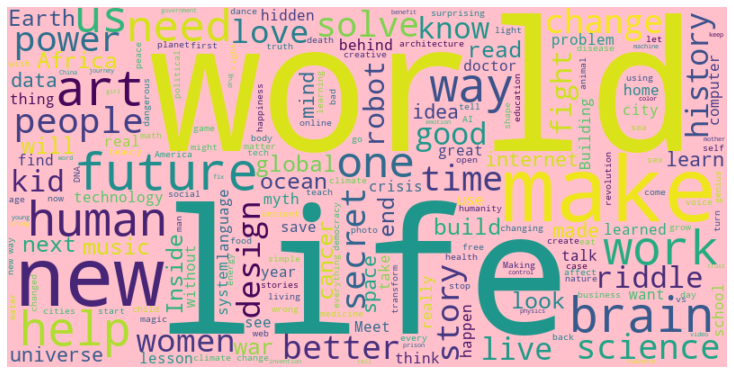

In [ ]:
# Making of word cloud from title column

text = " ".join(topic for topic in df.title.astype(str))
print ("There are {} words in the combination of all titles.".format(len(text)))


# Create and generate a word cloud image:

wordcloud = WordCloud(background_color="pink", width=800, height=400).generate(text)

plt.rcParams["figure.figsize"] = (15,5)
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

* **Majority of Titles contains words like life, world, make, new, future, art.** 

* ## **Topics column**

There are 404126 words in the combination of all topics.


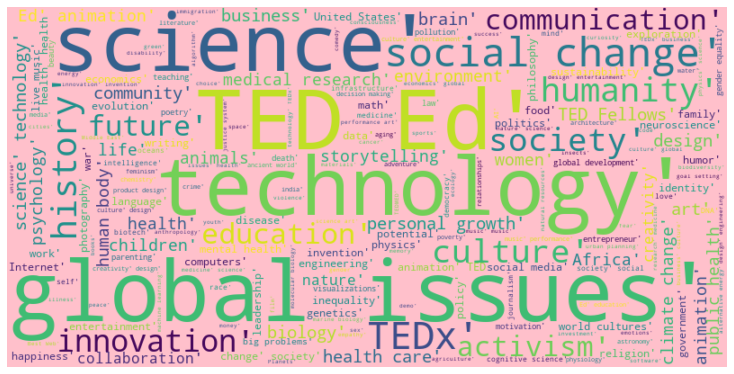

In [ ]:
# Making of word cloud from topics column

text = " ".join(topic for topic in df.topics.astype(str))
print ("There are {} words in the combination of all topics.".format(len(text)))


# Create and generate a word cloud image:

wordcloud = WordCloud(background_color="pink", width=800, height=400).generate(text)

plt.rcParams["figure.figsize"] = (15,5)
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

* **Most popular topic tags are technology, global issues, science, humanity, TED Ed.** 

* ## **Published_date column**

**Let's first convert published_date column in date time format.**

In [ ]:
# Applying strptime on published_date column

import datetime
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))

In [ ]:
# Extracting release day, month and year from the published date column

df['release_day'] = df['published_date'].apply(lambda x: x.weekday())
df['release_month']=df['published_date'].apply(lambda x: x.month)
df['release_year'] = df['published_date'].apply(lambda x: x.year)

**We have extracted weekday, month and year from published_date column and added three separate columns as:**
* **release_day**
* **release_month**
* **release_year**

* ## **Release_day column**

In [ ]:
# Encoding of release_day column with corresponding week day name

week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['release_day']=df['release_day'].map(week_day)

In [ ]:
# Checking the day of the month having maximum release date 

freq_rel_day=df[['release_day','views']].groupby('release_day').agg({'views' : 'count'})
freq_rel_day=freq_rel_day.sort_values('views',ascending=False)
freq_rel_day.reset_index(inplace=True)
freq_rel_day

,release_day,views
0,Tuesday,857
1,Thursday,832
2,Friday,789
3,Monday,727
4,Wednesday,703
5,Sunday,55
6,Saturday,42


Text(0.5, 1.0, 'Most frequent release days')

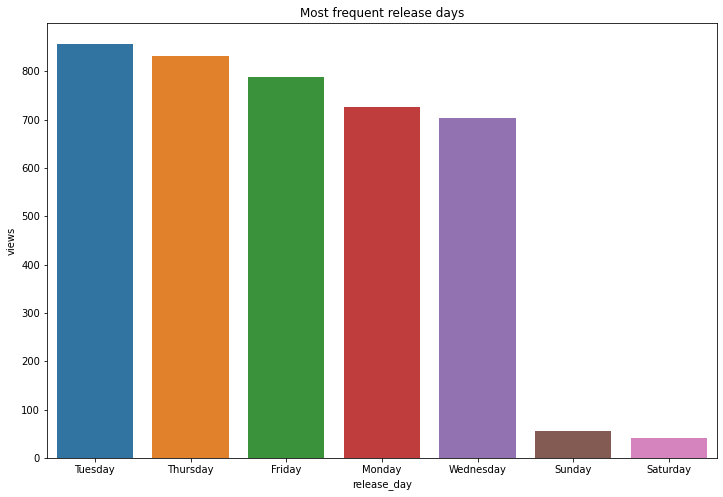

In [ ]:
# Barplot to show the day of the week having maximum release date 

plt.figure(figsize=(12,8))
sns.barplot(x='release_day',y='views',data=freq_rel_day)
plt.title('Most frequent release days')

* **Most videos are published on Tuesday followed by Thursday.**

### **Let's check the best release day of the week with respect to average views**

In [ ]:
# Extracting the best release day of the week w.r.t. average views

pop_rel_day=df[['release_day','views']].groupby('release_day').agg({'views' : 'mean'})
pop_rel_day=pop_rel_day.sort_values('views',ascending=False)
pop_rel_day.reset_index(inplace=True)

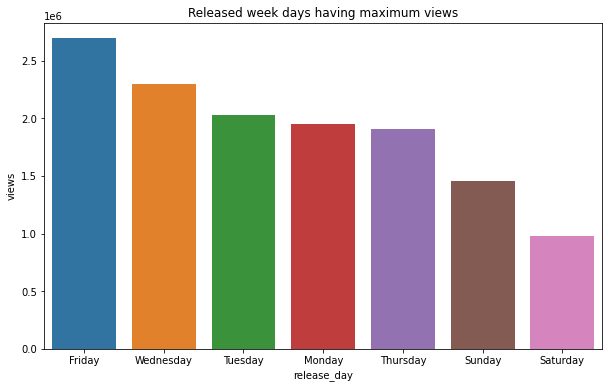

In [ ]:
# Barplot to show released week days having maximum views.

plt.figure(figsize=(10,6))
plt.title('Released week days having maximum views')
sns.barplot(x='release_day',y='views',data=pop_rel_day)

* **Videos published on Friday are more popular i.e. have more average views.**
* **Friday release is impacting the views of the video.**

* ## **Release_month column**

In [ ]:
# Encoding of release_month column with corresponding month name

month_dict={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['release_month']=df['release_month'].map(month_dict)

In [ ]:
# Checking months having maximum release 

freq_rel_month=df[['release_month','views']].groupby('release_month').agg({'views' : 'count'})
freq_rel_month=freq_rel_month.sort_values('views',ascending=False)
freq_rel_month.reset_index(inplace=True)

Text(0.5, 1.0, 'Most frequent release months')

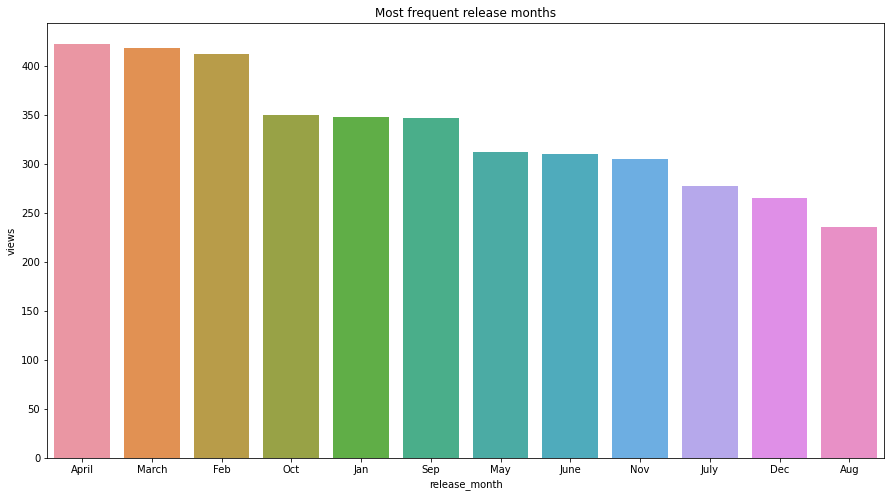

In [ ]:
# Barplot showing month having most frequent release. 

plt.figure(figsize=(15,8))
sns.barplot(x='release_month',y='views',data=freq_rel_month)
plt.title('Most frequent release months')

* **Most videos are released in April followed by March and Feb.**

### **Let's find the release month having maximum average views.**

In [ ]:
# Checking the most popular release month according to average Views

pop_rel_month=df[['release_month','views']].groupby('release_month').agg({'views' : 'mean'})
pop_rel_month=pop_rel_month.sort_values('views',ascending=False)
pop_rel_month.reset_index(inplace=True)

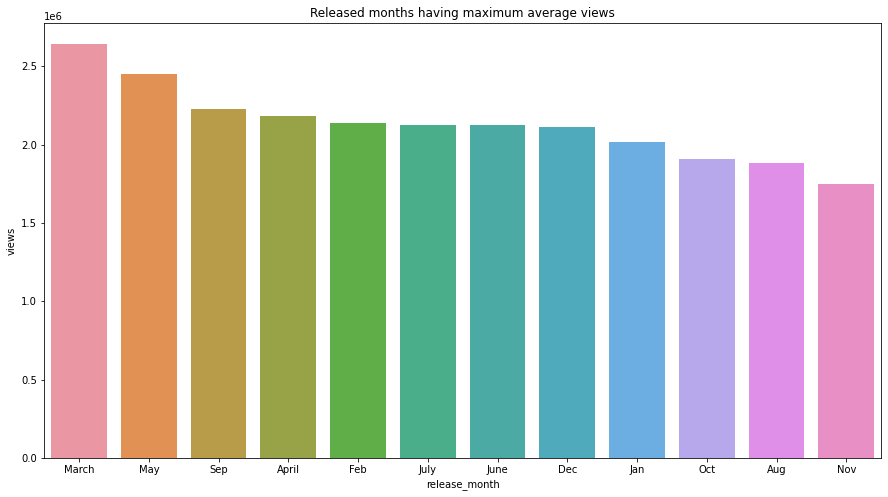

In [ ]:
# Barplot showing months having maximum average views.

plt.figure(figsize=(15,8))
plt.title('Released months having maximum average views')
sns.barplot(x='release_month',y='views',data=pop_rel_month)

* **Videos released in March month are more popular i.e. have more average views.**

* ## **Release_year column**

In [ ]:
# Checking years having maximum release 

freq_rel_year=df[['release_year','views']].groupby('release_year').agg({'views' : 'count'})
freq_rel_year=freq_rel_year.sort_values('views',ascending=False)
freq_rel_year.reset_index(inplace=True)

Text(0.5, 1.0, 'Most frequent release years')

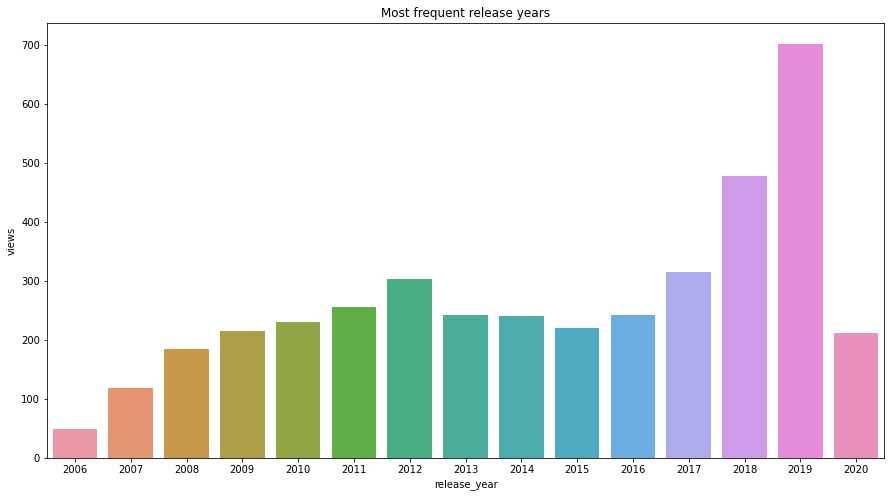

In [ ]:
# Barplot to show most frequent release years 

plt.figure(figsize=(15,8))
sns.barplot(x='release_year',y='views',data=freq_rel_year)
plt.title('Most frequent release years')

* **Most videos are published in 2019 followed by 2018.**

### **Let's find the release year having maximum average views.**

In [ ]:
# Extracting the most popular release years w.r.t. average Views

pop_rel_year=df[['release_year','views']].groupby('release_year').agg({'views' : 'mean'})
pop_rel_year=pop_rel_year.sort_values('views',ascending=False)
pop_rel_year.reset_index(inplace=True)

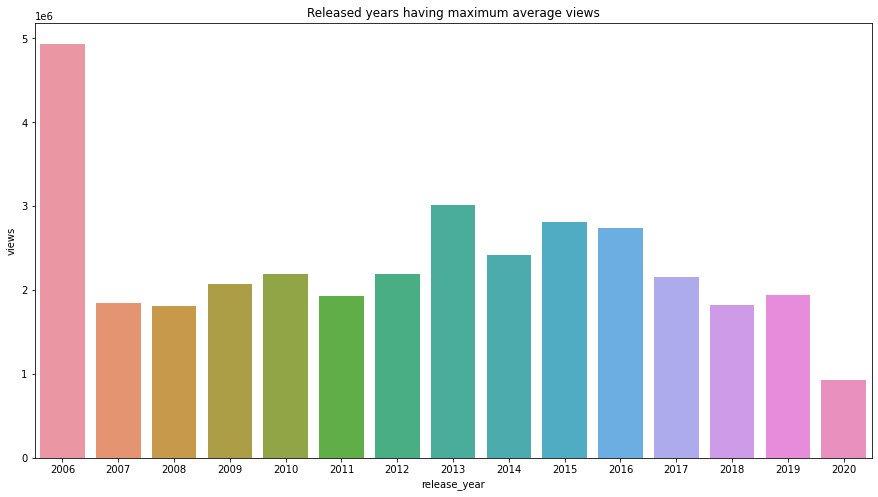

In [ ]:
# Barplot to show year which have maximum average views.

plt.figure(figsize=(15,8))
plt.title('Released years having maximum average views')
sns.barplot(x='release_year',y='views',data=pop_rel_year)

* **Videos published in 2006 have high number of views.**

* ## **Views column**

**This is our target as well as numerical variable. So, let's check its distribution.**

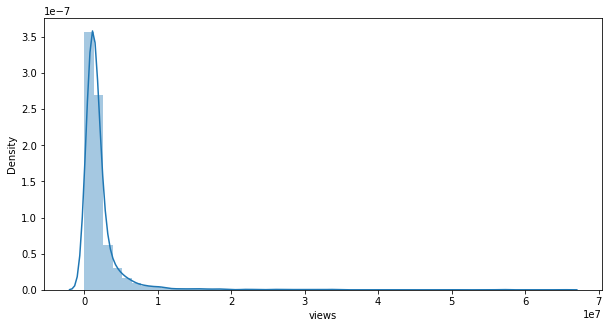

In [ ]:
# Distplot of views column

plt.figure(figsize=(10,5))
sns.distplot(df['views'])

* **The distribution of target variable is rightly skewed.**

* ## **Comments column**

**Let's check the distribution of comments column.**

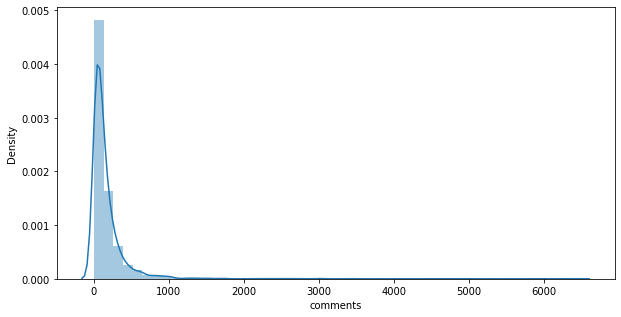

In [ ]:
# Distplot of comments column

plt.figure(figsize=(10,5))
sns.distplot(df['comments'])

* **The distribution of comments column is also rightly skewed.**

* ## **Duration column**

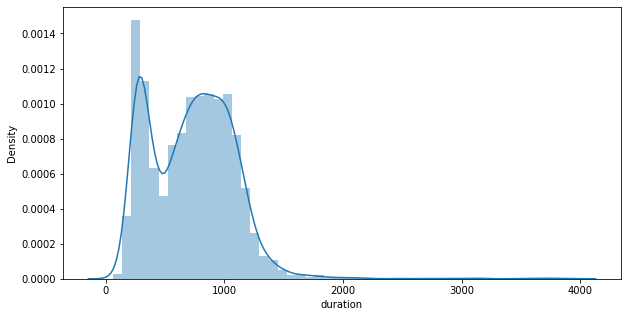

In [ ]:
# Distplot of duration column

plt.figure(figsize=(10,5))
sns.distplot(df['duration'])

* **The distribution of duration column is also rightly skewed.**

* ## **Talk_id column**

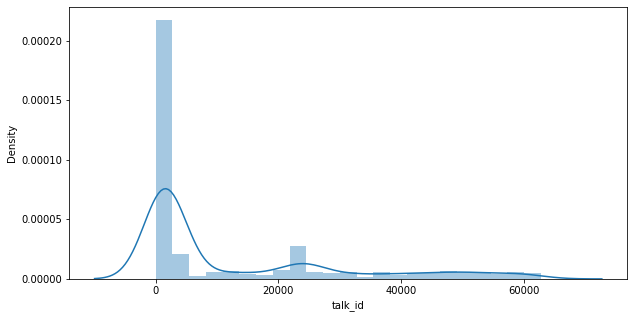

In [ ]:
# Distplot of duration column

plt.figure(figsize=(10,5))
sns.distplot(df['talk_id'])

* **The distribution of talk_id column is also rightly skewed.**

#**4. Feature Engineering**

##**Feature Engineering on Speaker_1 column**

**Let's do target encoding on speaker_1 column and create a new column speaker_1_avg_views**

In [ ]:
# Target encoding on speaker_1 column.

pop_speaker=df.groupby('speaker_1').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
pop_speaker=pop_speaker.to_dict()
pop_speaker=pop_speaker.values()
pop_speaker=  list(pop_speaker)[0]
df['speaker_1_avg_views']=df['speaker_1'].map(pop_speaker)

**Let's check the distribution of newly created column.**

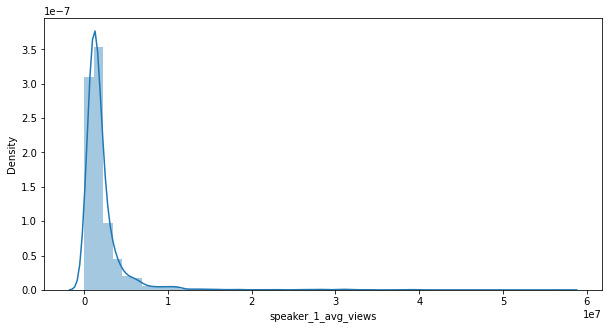

In [ ]:
# Distribution of speaker_1_avg_views column

plt.figure(figsize=(10,5))
sns.distplot(df['speaker_1_avg_views'])

* **The distribution of speaker_1_avg_views column is rightly skewed same as target variable.**

##**Feature Engineering on event column**

**The event column contains lots of similar values so let's combine them in a same category.**

In [ ]:
# Printing unique event categories.

event_list=list(df.event.unique())
print(event_list)

['TED2006', 'TED2004', 'TED2005', 'TEDGlobal 2005', 'TEDSalon 2006', 'TED2003', 'TED2007', 'TED2002', 'TEDGlobal 2007', 'TED2001', 'TEDSalon 2007 Hot Science', 'Skoll World Forum 2007', 'TED2008', 'TED1984', 'TED1990', 'DLD 2007', 'EG 2007', 'TED1998', 'LIFT 2007', 'TED Prize Wish', 'TEDSalon 2009 Compassion', 'Chautauqua Institution', 'Serious Play 2008', 'Taste3 2008', 'TED in the Field', 'TED2009', 'EG 2008', 'Elizabeth G. Anderson School', 'TEDxUSC', 'TED@State', 'TEDGlobal 2009', 'TEDxKC', 'TEDIndia 2009', 'TEDSalon London 2009', 'TEDxTC', 'TEDMED 2009', 'TEDxSMU', 'TEDxBoston 2009', 'TEDxBerlin', 'TED2010', 'TEDxAmsterdam', 'TEDxNASA', 'Mission Blue Voyage', 'TEDxPuget Sound', 'TEDxNYED', 'TEDSalon London 2010', 'TEDxEdmonton', 'TED@Cannes', 'TEDxAtlanta', 'TEDxEast', 'TEDxOilSpill', 'TEDGlobal 2010', 'TEDxBoston 2010', 'Business Innovation Factory', 'TEDxYYC', 'TEDxChange', 'TED Senior Fellows at TEDGlobal 2010', 'TEDxTelAviv 2010', 'TEDxDU 2010', 'TEDxMidwest', 'TEDxHouston', '

**Let's do target encoding on event column and create a new column event_wise_avg_views**

In [ ]:
# Target encoding on event column

pop_event=df.groupby('event').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
pop_event=pop_event.to_dict()
pop_event=pop_event.values()
pop_event=  list(pop_event)[0]
df['event_wise_avg_views']=df['event'].map(pop_event)

**Let's check the distribution of newly created column.**

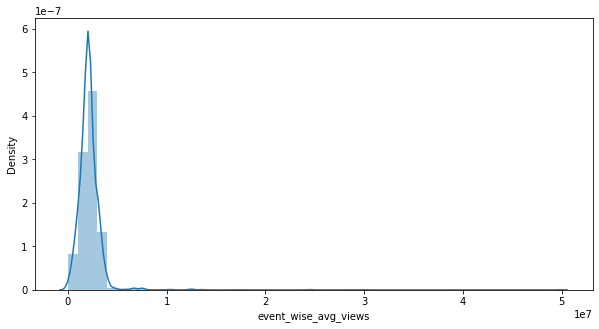

In [ ]:
# Distribution of event_wise_avg_views column

plt.figure(figsize=(10,5))
sns.distplot(df['event_wise_avg_views'])

* **The distribution of event_wise_avg_views column is rightly skewed same as target variable.**

* **Now, we can drop the event column now as it is of no use.**

In [ ]:
# Let's drop event column

df=df.drop(columns='event')

##**Feature Engineering on available_lang column**

**In available_lang column we have a list of available languages for each video.**

**Let's add a new feature 'num_of_lang' which contain the count of total no of language for a particular video.**

In [ ]:
# Applying eval function on available_lang column

df['available_lang'] = df.apply(lambda row: eval(row['available_lang']), axis=1)

In [ ]:
# Adding new feature num_of_lang

df['num_of_lang'] = df.apply(lambda x: len(x['available_lang']), axis=1)

**Now, we can drop available_lang column.**

In [ ]:
# Dropping the available_lang column

df.drop(columns='available_lang',inplace=True)

##**Feature Engineering on topics column**

* **The topics column contains the list of topic tags associated with each video.**

* **Then we will add a new feature 'num_of_tags' which contain the count of total no of topics for a particular video.**

In [ ]:
# Applying Eval funcion on topics column

df['topics'] = df.apply(lambda row: eval(row['topics']), axis=1)

In [ ]:
# Creating a new feature num_of_tags

df['num_of_tags'] = df.apply(lambda x: len(x['topics']), axis=1)

### **Now, let's do target encoding on topics column.**

In [ ]:
# Extracting the unique topics from topics list of each talk

unique_topics=[]
for i in range(0,len(df)):
  temp=df['topics'][i]
  for ele in temp:
    if(ele not in unique_topics):
      unique_topics.append(ele)

In [ ]:
# Extracting the avg views with respect to each topic in another dict unique_topics_avg_view_dict

unique_topics_avg_view_dict={}
for topic in unique_topics:
  temp=0
  count=0
  for i in range(0,len(df)):
    temp2=df['topics'][i]
    if(topic in temp2):
      temp+=df['views'][i]
      count+=1
  unique_topics_avg_view_dict[topic]=temp//count

# Storing the avg views with respect to topic for each talk

topics_wise_avg_views=[]
for i in range(0,len(df)):
  temp=0
  temp_topic=df['topics'][i]
  for ele in temp_topic:
    temp+=unique_topics_avg_view_dict[ele]
  
  topics_wise_avg_views.append(temp//len(temp_topic))

se = pd.Series(topics_wise_avg_views)
df['topics_wise_avg_views'] = se.values

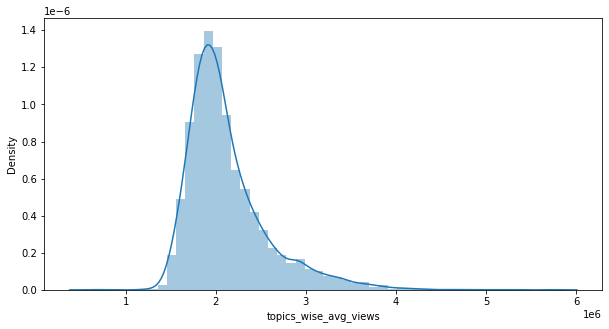

In [ ]:
# Distribution of topics_wise_avg_views

plt.figure(figsize=(10,5))
sns.distplot(df['topics_wise_avg_views'])

##**Feature Engineering on published_date column.**

**Let's create a new column called video_age which is the difference of current year and released year.**

**Then we can drop published_date column.**

In [ ]:
# Adding new feature video_age

df['video_age']=2021-df['release_year']

In [ ]:
# Now, drop published_date column

df=df.drop(columns='published_date')

##**Feature Engineering on related_talks column.**

* **Related_talks column contains a dictionary with talk_id as key and video title as it's value.**
* **Then we will create a new feature related_views which contains mean of the views of related talks for each video .**

In [ ]:
# applying eval function on related_talks column

df['related_talks'] = df.apply(lambda row: eval(row['related_talks']), axis=1)

In [ ]:
# Creating a new feature called related_views

df['related_views'] = 0

In [ ]:
# Extracting the value of related_talks

for index, row in df.iterrows():
    id_list=list(row['related_talks'].keys())
    temp=0
    for i in range(len(df)):
      if (df.loc[i,'talk_id']) in id_list:
        temp+=df.loc[i,'views']

    df.loc[index,'related_views']=temp//6

**Let's check the distribution of related_views column.**

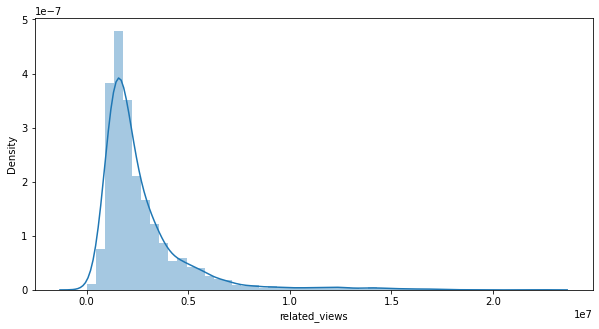

In [ ]:
# Distplot to show the distribution of related_views column

plt.figure(figsize=(10,5))
sns.distplot(df['related_views'])

* **Related_views column is rightly skewed.**

#**5. Data Cleaning**

## **5.1 Treating Nan values**

**Let's see number of null values in our dataset once again.**

In [ ]:
# Printing total number of missing values.

df.isna().sum()

talk_id                    0
title                      0
speaker_1                  0
all_speakers               4
occupations              522
about_speakers           503
views                      0
recorded_date              1
native_lang                0
comments                 655
duration                   0
topics                     0
related_talks              0
url                        0
description                0
transcript                 0
release_day                0
release_month              0
release_year               0
speaker_1_avg_views        0
event_wise_avg_views       0
num_of_lang                0
num_of_tags                0
topics_wise_avg_views      0
video_age                  0
related_views              0
dtype: int64

**Firstly, let's drop some unimportant columns.**

In [ ]:
# Dropping unimportant columns from the dataframe.

df.drop(columns=['talk_id','title','speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'recorded_date','topics','related_talks','transcript','description','release_year','url','native_lang'],inplace=True)

In [ ]:
# Printing total number of missing values.

df.isna().sum()

views                      0
comments                 655
duration                   0
release_day                0
release_month              0
speaker_1_avg_views        0
event_wise_avg_views       0
num_of_lang                0
num_of_tags                0
topics_wise_avg_views      0
video_age                  0
related_views              0
dtype: int64

**Now, we have null values only in comments column.**
**So, let's impute them.**

##**Imputing nan values of numerical columns using KNNImputer**

In [ ]:
# Importing KNNImputer library to impute nan values

from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputer.fit(df[['comments']])
df[['comments']] = imputer.transform(df[['comments']])

In [ ]:
# Let's see if there are any nan values in comments column

df[['comments']].isna().sum()

comments    0
dtype: int64

**Great! we have removed all null values from our numerical columns.**

### **We have plotted distribution plot of our numerical columns and we find that there are some outliers in our dataset.**

## **5.2 Outlier treatment**

In [ ]:
# Printing total number of outliers

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

comments                 361
duration                  21
event_wise_avg_views     156
num_of_lang              121
num_of_tags              116
related_views            300
release_day                0
release_month              0
speaker_1_avg_views      373
topics_wise_avg_views    242
video_age                  0
views                    393
dtype: int64

In [ ]:
# Replacing outliers with extreme values

for i in ['comments','duration','num_of_lang','num_of_tags','related_views','views','speaker_1_avg_views','topics_wise_avg_views','event_wise_avg_views']:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1

  df[i]=np.where(df[i]<(Q1 - 1.5 * IQR),(Q1 - 1.5 * IQR),np.where(df[i]>(Q3 + 1.5 * IQR),(Q3 + 1.5 * IQR),df[i]))

In [ ]:
# Let's check the outliers again

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

comments                 0
duration                 0
event_wise_avg_views     0
num_of_lang              0
num_of_tags              0
related_views            0
release_day              0
release_month            0
speaker_1_avg_views      0
topics_wise_avg_views    0
video_age                0
views                    0
dtype: int64

**Great! we have removed all outliers from our numerical columns.**

#**6. Feature Selection**

**Let's separate the dependent and independent variables.**

In [ ]:
# Separating the dependent(y) and independent(X) variables

X=df.drop(columns='views')
y=df['views']

**Let's do one hot encoding using get_dummies function.**

In [ ]:
# One hot encoding on independent features.

X=pd.get_dummies(X)
X.shape

(4005, 28)

**Let's do feature selection from these 28 independent variables and select the best set of features.**

##**Feature selection using f_regression.**

In [ ]:
# Calculating f scores of each features

f_scores = f_regression(X, y)

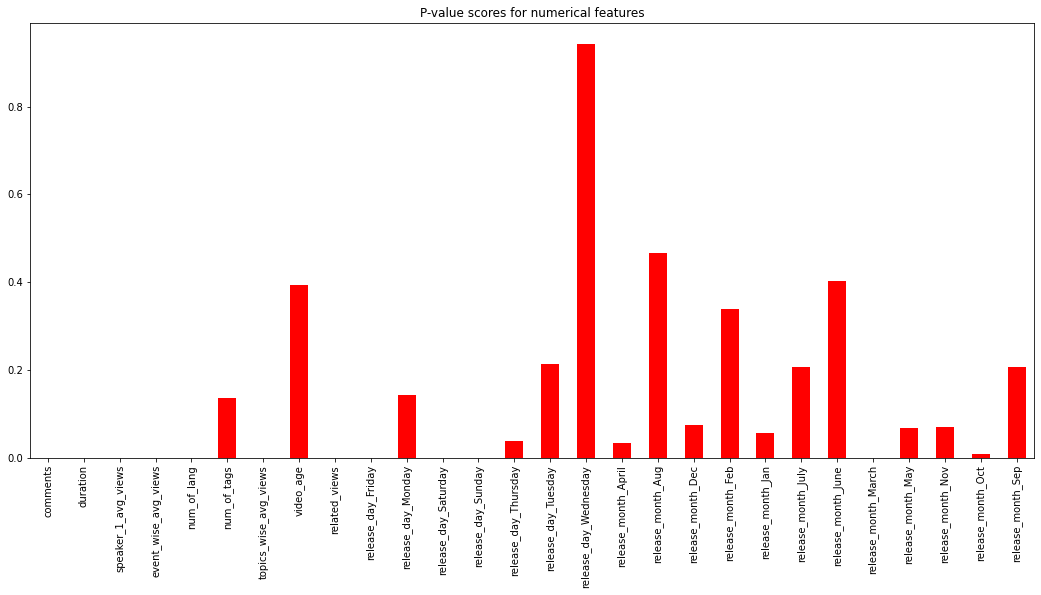

In [ ]:
# Let's plot the f scores of independent variable.

p_values= pd.Series(f_scores[1],index= X.columns)
p_values.plot(kind='bar',color='red',figsize=(18,8))
plt.title('P-value scores for numerical features')
plt.show()

### **We can drop some features which have high p_values.**

In [ ]:
# Let's take the important features only.

X=X[['comments', 'duration', 'num_of_lang','event_wise_avg_views','related_views', 'release_day_Friday','speaker_1_avg_views','topics_wise_avg_views','release_day_Saturday','release_day_Sunday','release_month_March']]

**Plotting the correlation matrix.**

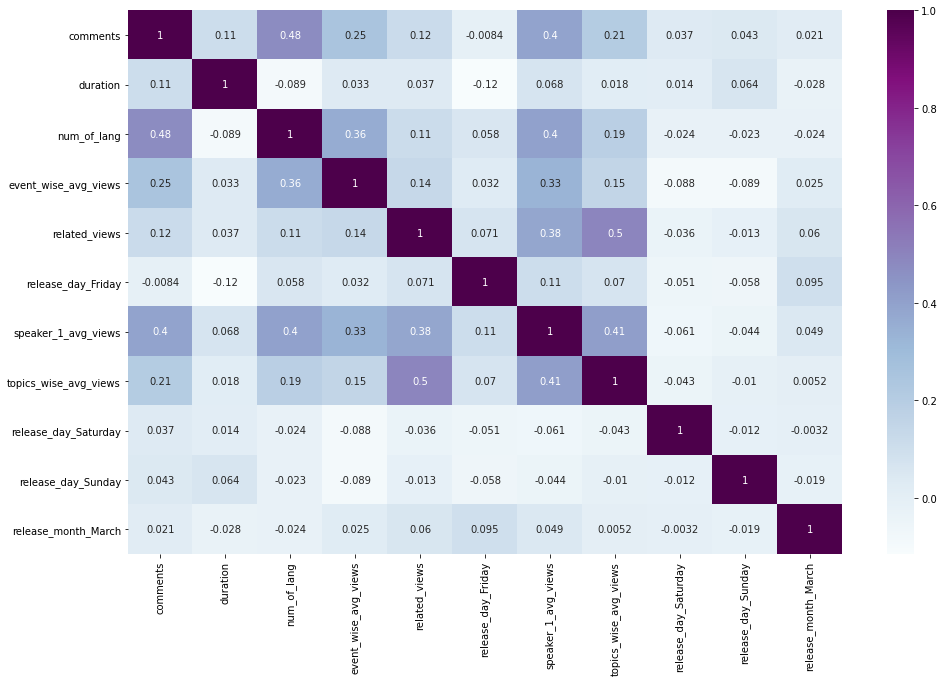

In [ ]:
# Correlation matrix of numerical features.

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
sns.heatmap(X.corr(),annot=True, cmap='BuPu')

##**Train test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## **Data Scaling**

**Before fitting data into model we need to scale them.**

In [ ]:
# Feature Scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#**7. Regression models and HyperParameter Tuning**


##**7.1 Random Forest Regressor**

**First, we will apply Random Forest Regressor with default hyperparameters.**

In [ ]:
# Fitting Random Forest regressor model.

rf = RandomForestRegressor(criterion='mae')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 93999.70
Test MAE: 232971.22


* **It's not a good score but we can improve by doing some hyperparameter tuning.**

###**Hyperparameter Tuning using Randomized Search CV**

In [ ]:
#Random Forest Regressor hyperparameters.

# Number of trees
n_estimators = [80,100,120,150]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,80,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [10,30,40,50]

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the random forest regressor
rf_model = RandomForestRegressor(criterion='mae')

#RandomSearch
rf_random = RandomizedSearchCV(rf_model,param_dict,verbose=0,cv=5)
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mae',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
# Let's see which set of hyperparameters are optimal.

rf_optimal_model = rf_random.best_estimator_
rf_optimal_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=30,
                      min_samples_split=50, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

**So, above are the best hyperparameters for our model.**

In [ ]:
# Calculating the MAE on train and test set

y_pred = rf_optimal_model.predict(X_train)
y_test_pred = rf_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 185966.01
Test MAE: 193128.38


In [ ]:
# Making predictions for test data and also calculating r2_score
y_hat = rf_optimal_model.predict(X_test)
print(f'R_squared value for train: {rf_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)


#Calculating Adjusted R-sqaured
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test set the R_Squared for RFforest is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

R_squared value for train: 0.8083273155914181
For test set the R_Squared for RFforest is 0.8016331406905195 and adjusted R_Squared is 0.8010866755133583


In [ ]:
#Let's store all the scores in a dataframe

rf=RandomForestRegressor(criterion='mae',max_depth=6,min_samples_leaf=30,min_samples_split=80,n_estimators=150,random_state=42)
rf_optimal_model=rf.fit(X_train,y_train)
model_data=[]
model_dict={}
model_dict["Model_Name"] = 'RandomForestRegressor'
model_dict["MAE_train"] =mean_absolute_error(y_train, rf_optimal_model.predict(X_train))
model_dict["MAE_test"] =mean_absolute_error(y_test, rf_optimal_model.predict(X_test))
model_dict["R2_Score_train"] = r2_score(y_train,rf_optimal_model.predict(X_train))
model_dict["R2_Score_test"] = r2_score(y_test,rf_optimal_model.predict(X_test))
model_dict["RMSE_train"] = np.sqrt(mean_squared_error(y_train,rf_optimal_model.predict(X_train)))
model_dict["RMSE_test"] = np.sqrt(mean_squared_error(y_test,rf_optimal_model.predict(X_test)))
model_data.append(model_dict)

results_df_rf = pd.DataFrame(model_data)

In [ ]:
# Printing the results_df_rf

results_df_rf

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_train,RMSE_test
0,RandomForestRegressor,186755.615047,192512.213794,0.806505,0.802615,484980.885988,489710.718664


###**Feature importance score w.r.t. RF model**

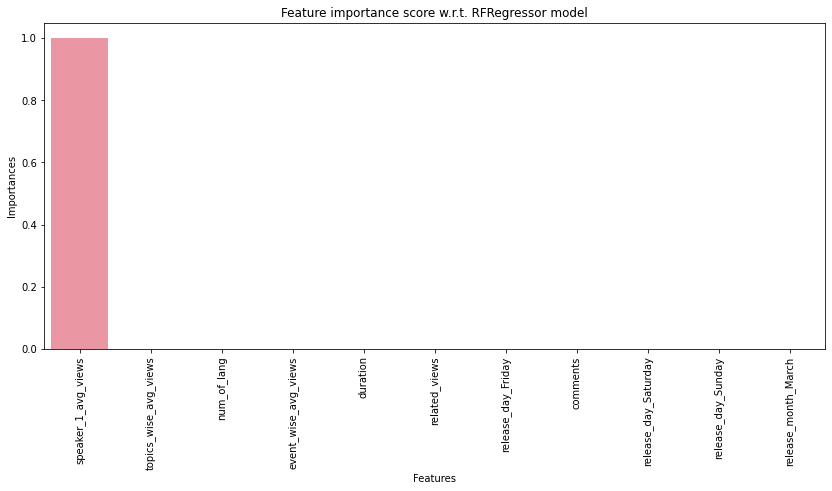

In [ ]:
# Barplot showing important features w.r.t. RF model

importances = pd.DataFrame({'Features': X.columns, 
                                'Importances': rf_optimal_model.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 6))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.title('Feature importance score w.r.t. RFRegressor model')
plt.show()

* **speaker_1_avg_views is the most important feature in RandomForestregressor.**

##**7.3 XGboost Regressor model**

In [ ]:
#XGBoost Regressor hyperparameters

# Number of trees
n_estimators = [30,50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [30,40,50]

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the XGBoost
xgb_model = XGBRegressor(learning_rate=0.1)

#RandomSearch
xgb_random = RandomizedSearchCV(xgb_model,param_dict,verbose=2,cv=5)
xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=30, max_depth=6 
[12:22:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=30, max_depth=6, total=   0.5s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=30, max_depth=6 
[12:22:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=30, max_depth=6, total=   0.3s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=30, max_depth=6 
[12:22:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=30, max_depth=6, total=   0.3s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=30, max_depth=6 
[12:22:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=30, max_depth=6, total=   0.3s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=30, max_depth=6 
[12:22:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=30, max_depth=6, total=   0.3s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   10.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                                  

In [ ]:
# Let's see which set of hyperparameters are optimal

xgb_optimal_model = xgb_random.best_estimator_
xgb_optimal_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, min_samples_leaf=30,
             min_samples_split=150, missing=None, n_estimators=80, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

In [ ]:
# Making predictions for test data and also calculating r2_score.

y_hat = xgb_optimal_model.predict(X_test)
print(f'r_squared value for train: {xgb_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)

# Calculating Adjusted R-sqaured

adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test set the R_Squared for XGBoost is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

r_squared value for train: 0.9169072379035487
For test set the R_Squared for XGBoost is 0.8293011313562205 and adjusted R_Squared is 0.82883088653902


In [ ]:
# Calculating MAE for training and test set.

y_pred = xgb_optimal_model.predict(X_train)
y_test_pred = xgb_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 164063.68
Test MAE: 227225.90


In [ ]:
# Let's store all the scores in a dataframe

xgb=XGBRegressor(base_score=0.5, booster='gbtree',colsample_bytree=1, gamma=0,importance_type='gain', learning_rate=0.1,max_depth=3, min_samples_leaf=40,
             min_samples_split=40, n_estimators=40)
xgb_optimal_model=xgb.fit(X_train,y_train)
model_data=[]
model_dict={}
model_dict["Model_Name"] = 'XGBRegressor'
model_dict["MAE_train"] =mean_absolute_error(y_train, xgb_optimal_model.predict(X_train))
model_dict["MAE_test"] =mean_absolute_error(y_test, xgb_optimal_model.predict(X_test))
model_dict["R2_Score_train"] = r2_score(y_train,xgb_optimal_model.predict(X_train))
model_dict["R2_Score_test"] = r2_score(y_test,xgb_optimal_model.predict(X_test))
model_dict["RMSE_train"] = np.sqrt(mean_squared_error(y_train,xgb_optimal_model.predict(X_train)))
model_dict["RMSE_test"] = np.sqrt(mean_squared_error(y_test,xgb_optimal_model.predict(X_test)))
model_data.append(model_dict)

results_df_xgb = pd.DataFrame(model_data)

[12:33:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# Printing the results_df_xgb 

results_df_xgb

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_train,RMSE_test
0,XGBRegressor,211051.556655,228812.768108,0.866211,0.832566,403273.960146,451028.530993


###**Feature importance score w.r.t. XGBRegressor model**

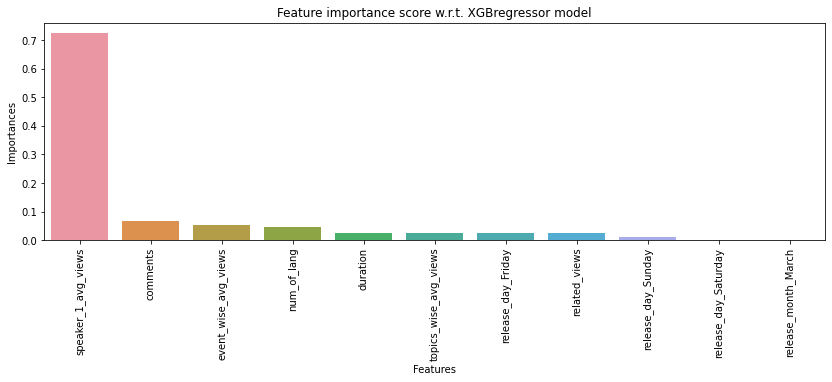

In [ ]:
# Barplot showing important features w.r.t. XGBregressor model

importances = pd.DataFrame({'Features': X.columns, 
                                'Importances': xgb_optimal_model.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.title('Feature importance score w.r.t. XGBregressor model')
plt.show()

* **speaker1_avg_views is the most important feature in XGBregressor model.**

##**7.4 ExtraTrees Regressor.**

In [ ]:
#Extra Trees Regressor hyperparameters tuning

# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Creating an instance of the Extratrees regressor
et_model = ExtraTreesRegressor(criterion='mae')

#RandomSearch
et_random = RandomizedSearchCV(et_model,param_dict,verbose=2,cv=5)
et_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=50, min_samples_split=150, min_samples_leaf=40, max_depth=6 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=50, min_samples_split=150, min_samples_leaf=40, max_depth=6, total=   3.9s
[CV] n_estimators=50, min_samples_split=150, min_samples_leaf=40, max_depth=6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=150, min_samples_leaf=40, max_depth=6, total=   3.9s
[CV] n_estimators=50, min_samples_split=150, min_samples_leaf=40, max_depth=6 
[CV]  n_estimators=50, min_samples_split=150, min_samples_leaf=40, max_depth=6, total=   3.9s
[CV] n_estimators=50, min_samples_split=150, min_samples_leaf=40, max_depth=6 
[CV]  n_estimators=50, min_samples_split=150, min_samples_leaf=40, max_depth=6, total=   3.8s
[CV] n_estimators=50, min_samples_split=150, min_samples_leaf=40, max_depth=6 
[CV]  n_estimators=50, min_samples_split=150, min_samples_leaf=40, max_depth=6, total=   3.9s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=50, max_depth=8 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=50, max_depth=8, total=   7.8s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=50, max_depth=8 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=50, max_depth=8, total=   7.8s
[CV] n_estimators=100, min_samples_sp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criterion='mae',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                         

In [ ]:
# Let's see optimal set of hyperparameters for this model.

et_optimal_model = et_random.best_estimator_
et_optimal_model

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                    max_depth=8, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=50,
                    min_samples_split=100, min_weight_fraction_leaf=0.0,
                    n_estimators=50, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
# Calculating MAE for training and test set

y_pred = et_optimal_model.predict(X_train)
y_test_pred = et_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 194674.22
Test MAE: 191650.59


In [ ]:
# Making predictions for test data and also calculating r2_score

y_hat = et_optimal_model.predict(X_test)
print(f'r_squared value for train: {rf_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)

#Calculate Adjusted R-sqaured

adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test the R_Squared for ExtraTreesRegressor is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

r_squared value for train: 0.8065049876728183
For test the R_Squared for ExtraTreesRegressor is 0.8075439556566961 and adjusted R_Squared is 0.8070137737163564


In [ ]:
# Let's store all the scores in a dataframe

et=ExtraTreesRegressor(criterion='mae',max_depth=8, min_samples_leaf=50,min_samples_split=100, n_estimators=50)
et_optimal_model=et.fit(X_train,y_train)
model_data=[]
model_dict={}
model_dict["Model_Name"] = 'ExtraTreeRegressor'
model_dict["MAE_train"] =mean_absolute_error(y_train, et_optimal_model.predict(X_train))
model_dict["MAE_test"] =mean_absolute_error(y_test, et_optimal_model.predict(X_test))
model_dict["R2_Score_train"] = r2_score(y_train,et_optimal_model.predict(X_train))
model_dict["R2_Score_test"] = r2_score(y_test,et_optimal_model.predict(X_test))
model_dict["RMSE_train"] = np.sqrt(mean_squared_error(y_train,et_optimal_model.predict(X_train)))
model_dict["RMSE_test"] = np.sqrt(mean_squared_error(y_test,et_optimal_model.predict(X_test)))
model_data.append(model_dict)

results_df_et = pd.DataFrame(model_data)

In [ ]:
# Printing the results_df_et

results_df_et

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_train,RMSE_test
0,ExtraTreeRegressor,198934.462943,196852.277654,0.79995,0.808655,493127.367254,482160.410391


###**Feature importance score w.r.t. ExtraTrees Regressor model**

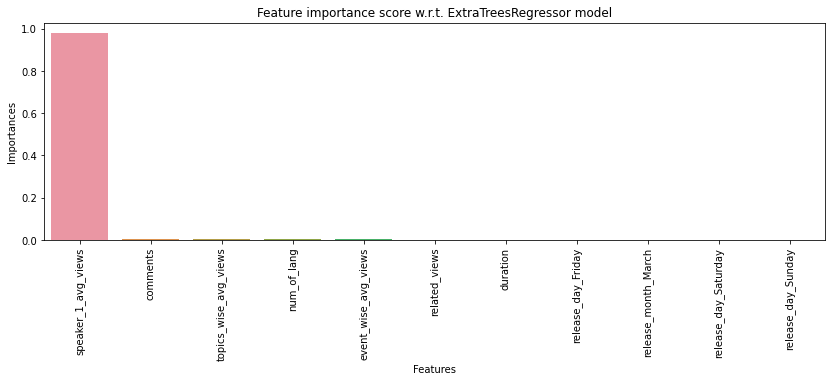

In [ ]:
# Barplot showing important features w.r.t. ExtraTrees Regressor model.

importances = pd.DataFrame({'Features': X.columns, 
                                'Importances': et.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.title('Feature importance score w.r.t. ExtraTreesRegressor model')
plt.show()

* **speaker1_avg_views is the most important feature in RandomForestregressor followed by comments.**

###**In all the models speaker_1_avg_views is impacting the much.**

#**8. Comparison of different regressor Models**

##**The ML regressor models that we have used are :**

* Random Forest Regressor
* Extra Tree Regressor
* XGB Regressor

* **Let's store the scores of these models in a new dataframe.**

In [ ]:
#Defining all these models

models = [
           ['RandomForest ',RandomForestRegressor(criterion='mae',max_depth=6,min_samples_leaf=30,min_samples_split=80,n_estimators=150,random_state=42)],
           ['ExtraTreeRegressor :',ExtraTreesRegressor(criterion='mae',max_depth=8, min_samples_leaf=50,min_samples_split=100, n_estimators=50)],
           ['XGBRegressor: ', XGBRegressor(base_score=0.5, booster='gbtree',colsample_bytree=1, gamma=0,importance_type='gain', learning_rate=0.1,max_depth=3, min_samples_leaf=40,
             min_samples_split=40, n_estimators=40)]        
        ]

In [ ]:
#Let's run all the models and store the scores

model_data = []
for name,curr_model in models :
    model_dict = {}
    curr_model.random_state = 78
    model_dict["Model_Name"] = name
    curr_model.fit(X_train,y_train)
    model_dict["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    model_dict["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    model_dict["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
    model_dict["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
    model_dict["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    model_dict["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(model_dict)

[12:52:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# Printing the results dataframe

comparision_df = pd.DataFrame(model_data)
comparision_df

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,RandomForest,186638.460863,192011.316625,0.806400,0.803162,485112.674688,489031.640334
1,ExtraTreeRegressor :,197961.601666,195381.403519,0.796220,0.806408,497703.788585,484983.269104
2,XGBRegressor:,211051.556655,228812.768108,0.866211,0.832566,403273.960146,451028.530993


## **Let's plot the RMSE score of all three models.**

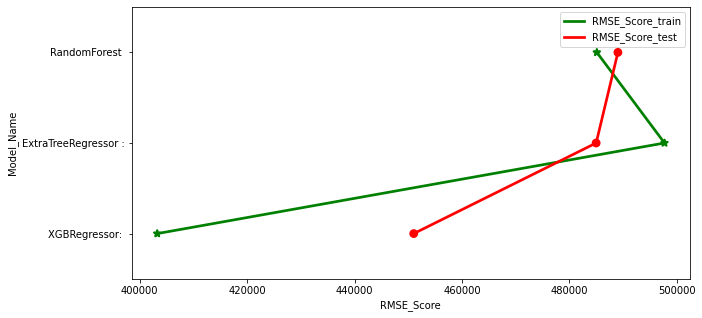

In [ ]:
# Pointplot showing RMSE score of train and test set.

x=plt.figure(figsize=(10,5))
# creating subplots
# ax = plt.subplots()
# plotting columns
ax = sns.pointplot(x=comparision_df["RMSE_Score_train"], y=comparision_df["Model_Name"], color='g',alpha=0.2,labels=('RMSE_Score_train'), markers = '*')
ax = sns.pointplot(x=comparision_df["RMSE_Score_test"], y=comparision_df["Model_Name"], color='r',alpha=0.7,labels=('RMSE_Score_test'),markers='o')
# renaming the axes
ax.set(xlabel="RMSE_Score", ylabel="Model_Name")
ax.legend(handles=ax.lines[::len(comparision_df)+1], labels=["RMSE_Score_train","RMSE_Score_test"])

## **Let's plot the MAE score of all three models.**

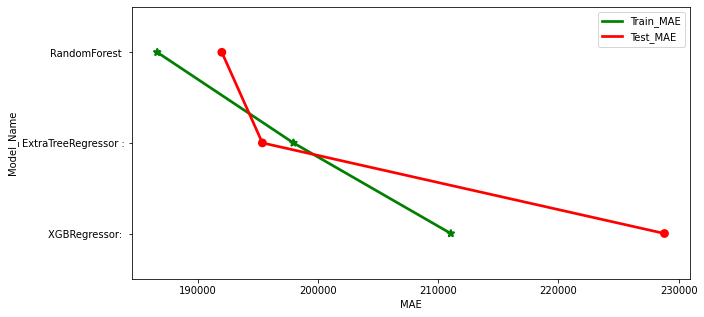

In [ ]:
# Pointplot showing MAE score of train and test set

x=plt.figure(figsize=(10,5))
# creating subplots
# ax = plt.subplots()
# plotting columns
ax = sns.pointplot(x=comparision_df["MAE_train"], y=comparision_df["Model_Name"], color='g',alpha=0.2,labels=('MAE_train'), markers = '*')
ax = sns.pointplot(x=comparision_df["MAE_test"], y=comparision_df["Model_Name"], color='r',alpha=0.7,labels=('MAE_test'),markers='o')
# renaming the axes
ax.set(xlabel="MAE", ylabel="Model_Name")
ax.legend(handles=ax.lines[::len(comparision_df)+1], labels=["Train_MAE","Test_MAE"])

#**9. Final selection of the model**

**We choose MAE and not RMSE as the deciding factor of our model selection  because of the following reasons:**

* **RMSE is heavily influenced by outliers as in the higher the values get the more the RMSE increases.**
* **MAE doesn’t increase with outliers. MAE is linear and RMSE is quadratically increasing.**

* **The best performing regressor model for this dataset is Random Forest Regressor on the basis of MAE.**

In [ ]:
# Let's print the scores of Random Forest Regressor model 

results_df_rf

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_train,RMSE_test
0,RandomForestRegressor,186755.615047,192512.213794,0.806505,0.802615,484980.885988,489710.718664


In [ ]:
# Printing mean value of target variable.

print(f'Mean value of our target variable is {y.mean()}')

Mean value of our target variable is 1661354.1194756555


* **For Random Forest Regressor model, MAE is around 10 % of target variable mean.**

#**10. Conclusion**

###Out of all the models, MAE of Random Forest Regressor is around 10% of average views. So, we have been able to predict views 90% correctly.

###RandomForestRegressor is the best performer in terms of MAE.
###In all the features speaker_wise_avg_views is most important this implies that speakers are directly impacting the views.
### Duration of talk is not correlated to the number of views however, longest talks belong to the least viewed category.
### Increasing the number of languages the talk is available in, increases the views of the TED talks.
### Least viewed TED talks have words like war, politics, world, cultures, government while the most viewed TED talks have words like psychology, work, technology, science, humour.
### Month of publishing does not affect the popularity of talk.
### Majority of best TED talks are single speaker talks.